In [1]:
import numpy as np
import matplotlib.pyplot as plt

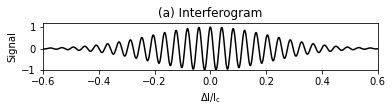

In [9]:
pi = np.pi
ln2 = np.log(2)
lambda_0 = 830e-9 #center wavelength
d_lambda = 60e-9 #bandwidth (delta lambda)
c = 3e8 #speed of light
lc = 4*ln2/pi*lambda_0**2/d_lambda #coherence length
Number_of_periods = 0.5*lc/(lambda_0/2) #of periods in FWHM

plt.figure(1)
# plt.suptitle("TD-OCT Simulation",fontsize=25,fontweight=100)
plt.subplot(4,1,1) #interferogram
N = 2**12 #number of sampling points
dl = lc*np.linspace(-2, 2,N) #array for Delta_1
k_0 = 2*pi/lambda_0 #propagation constant
I_ac = np.exp(-16*ln2*((dl/lc)**2))*np.cos(2*k_0*dl)
plt.plot(dl/lc, I_ac, 'k')
plt.title("(a) Interferogram")
plt.xlabel(r"$\mathregular{\Delta{l}/l_c}$")
plt.ylabel("Signal")
plt.axis([-0.6, 0.6, -1, 1.2])
plt.show()

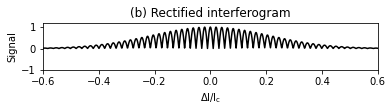

In [10]:
plt.subplot(4,1,2) #rectified interferogram
I_rec = np.abs(I_ac) #absolute value of I_ac
plt.plot(dl/lc, I_rec, 'k')
plt.title("(b) Rectified interferogram")
plt.xlabel(r"$\mathregular{\Delta{l}/l_c}$")
plt.ylabel("Signal")
plt.axis([-0.6, 0.6, -1, 1.2])
plt.show()

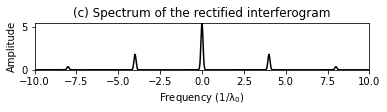

In [11]:
plt.subplot(4,1,3) #spectrum of the rectified interferogram
Frec_1 = np.fft.fft(I_rec)/np.sqrt(N)# order of frequencies: 0,1...(N/2-1),-N/2,-(N/2-1)...-1
Frec_2 =np.fft.fftshift(Frec_1)#shifted order of frequencies: -N/2,-(N/2-1)...-1, 0,1...(N/2-1)
d_freq = 1/(4*lc)  #4=2-(-2) frequency bin size = 1/sampling range
freq=d_freq*np.arange(-N/2,N/2) #frequency array
plt.plot(freq*lambda_0, np.abs(Frec_2), 'k')
plt.title("(c) Spectrum of the rectified interferogram")
plt.xlabel(r"Frequency $\mathregular{(1/\lambda_0)}$")
plt.ylabel("Amplitude")
plt.axis([-10,10,0,5.5])
plt.show()

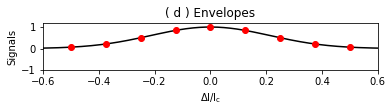

In [12]:
plt.subplot(4,1,4) #envelope
freq_cut = 1/lambda_0/2 #cut-off frequency for filtering
i_cut = int(round(freq_cut/d_freq)) #convert freq_cut to an array index
F_filt = Frec_1.copy() #initialize array
F_filt[i_cut:N-i_cut+1]=0 #filter
I_filt = np.abs(np.fft.ifft(F_filt))*np.sqrt(N) #amplitude of inverse FFT
I_ac_en =  np.exp(-16*ln2*((dl/lc)**2))
plt.plot(dl/lc, I_filt/I_filt.max(), 'k',label="Demodulted")
plt.plot(dl[np.arange(0,N,int(N/32))]/lc, I_ac_en[np.arange(0,N,int(N/32))], 'ro',label="original")
plt.title("( d ) Envelopes")
plt.xlabel(r"$\mathregular{\Delta{l}/l_c}$")
plt.ylabel("Signals")
plt.axis([-0.6,0.6,-1,1.2])
plt.show()

No handles with labels found to put in legend.


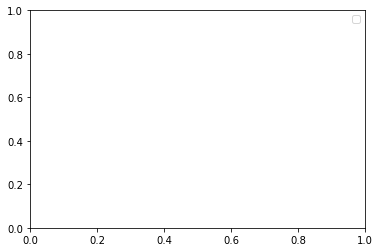

In [13]:
plt.legend()

plt.subplots_adjust(hspace=0.6)

plt.show()
# plt.tight_layout(h_pad=2)